<h1>Домашнее задание к вебинару 4<h1>

##### **Задание 1**. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout, Flatten, Activation, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

In [2]:
#Загрузка данных cifar10 и подготовка данных
# разделение тренировочной и тестовой выборки
(X_train, y_train_labels), (X_test, y_test_labels) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные данные')
print(X_test.shape[0], 'тестовые данные')


170508288/170498071 [==============================] - 3s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные данные
10000 тестовые данные


In [3]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [4]:
y_train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
#Преобразование данных
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)


X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
num_classes = len(y_train[1])

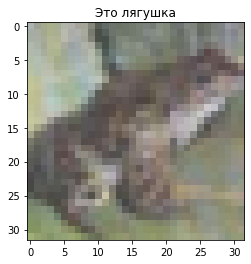

In [8]:
# Визуализируем картинку из тестового набора данных
N = 140

plt.title(f'Это {classes[np.argmax(y_test[N,:])]}')
plt.imshow(X_test[N][:,:,:])
plt.show()

In [9]:
batch_size = 200
epochs=20

results = {'model': [],
           'conv layers': [],
           'max filters': [],
           'train acc': [],
           'test acc': []}

In [10]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
#слой 1
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#слой 2
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(70))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(optimizer = Adam(),
              loss = CategoricalCrossentropy(),
              metrics = ['accuracy']
              )

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose = 0)



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        1168      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                        

In [12]:
def show_accuracy(model, X_test, y_test):
    train_acc = history.history['accuracy'][-1]
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
    print(f'Accuracy train: {train_acc:.4f},\n'
        f'Accuracy test: {test_acc:.4f}')
  
    return train_acc, test_acc

In [13]:
train_acc, test_acc = show_accuracy(model, X_test, y_test)

Accuracy train: 0.5439,
Accuracy test: 0.6145


In [14]:
results['model'].append('model_baselne')
results['conv layers'].append('2')
results['max filters'].append('32')
results['train acc'].append(train_acc)
results['test acc'].append(test_acc)

In [15]:
N=140

y_pred_probs = model.predict(X_test[N][None])
y_pred = np.argmax(y_pred_probs)

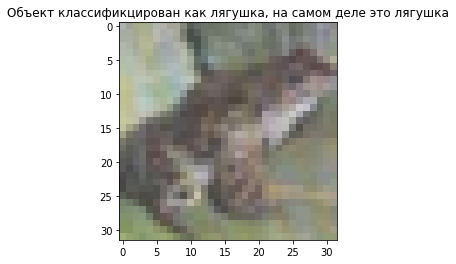

In [16]:
plt.title(f'Объект классификцирован как {classes[y_pred]}, на самом деле это {classes[int(y_test_labels[N])]}')
plt.imshow(X_test[N])
plt.show()

Модель получилась слабая! Будем ее дорабатывать

##### **Задание 2** Оценить рост точности при увеличении ширины сети (больше/меньше фильтров)

In [17]:
def fit_model(model, X_train, y_train, X_test, y_test):
    # Выполним компиляцию
    model.compile(optimizer = Adam(),
              loss = CategoricalCrossentropy(),
              metrics = ['accuracy']
              ) 
  
  

    history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose = 0)
  
    return history


In [18]:
# конфигурирование слоев нейросети
model1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
#слой 1
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

#слой 2
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

# линейные полносвязные слои
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

history = fit_model(model1, X_train, y_train, X_test, y_test)
train_acc, test_acc = show_accuracy(model1, X_test, y_test)

Accuracy train: 0.7590,
Accuracy test: 0.6856


In [19]:
results['model'].append('model1')
results['conv layers'].append('2')
results['max filters'].append('64')
results['train acc'].append(train_acc)
results['test acc'].append(test_acc)

In [20]:
# УВЕЛИЧИМ КОЛИЧЕСТВО КАНАЛОВ

model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
#слой 1
model2.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))

#слой 2
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

history = fit_model(model2, X_train, y_train, X_test, y_test)
train_acc, test_acc = show_accuracy(model2, X_test, y_test)

Accuracy train: 0.9055,
Accuracy test: 0.7269


In [21]:
results['model'].append('model2')
results['conv layers'].append('2')
results['max filters'].append('128')
results['train acc'].append(train_acc)
results['test acc'].append(test_acc)

С увеличением количества фильтров, метрика также увеличивается, однако сильное переобучение. Оставим пока максимум 128 фильтров и попробуем невелировать переобучение

In [22]:
#ДОБАВИМ BATCH NORMALIZATION и увеличим количество нейронов линейных слоев

# конфигурирование слоев нейросети
model3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
# слой 1
model3.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# слой 2
model3.add(Conv2D(128, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# полносвязные линейные слои
model3.add(Flatten())
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

history = fit_model(model3, X_train, y_train, X_test, y_test)
train_acc, test_acc = show_accuracy(model3, X_test, y_test)

Accuracy train: 0.8254,
Accuracy test: 0.7425


In [23]:
results['model'].append('model3_added_batch_norm')
results['conv layers'].append('2')
results['max filters'].append('128')
results['train acc'].append(train_acc)
results['test acc'].append(test_acc)

Нормализация (стандартизация) поспособствовала увеличению метрики. Однако переобучение сохранилось.

In [24]:
# ЕЩЕ УВЕЛИЧИМ КОЛИЧЕСТВО КАНАЛОВ 

# конфигурирование слоев нейросети
model4 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
#слой 1
model4.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

#слой 2
model4.add(Conv2D(256, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

# линейные полносвязные слои
model4.add(Flatten())
model4.add(Dense(256))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

history = fit_model(model4, X_train, y_train, X_test, y_test)
train_acc, test_acc = show_accuracy(model4, X_test, y_test)

Accuracy train: 0.8842,
Accuracy test: 0.7759


Метрика снова повысилась

In [25]:
results['model'].append('model4')
results['conv layers'].append('2')
results['max filters'].append('256')
results['train acc'].append(train_acc)
results['test acc'].append(test_acc)

In [27]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 activation_20 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 16, 16, 128)      512       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 256)      

Итак, с увеличением количества фильтров метрика на трейне увеличивается, однако, присутствует переобучение. Попробуем теперь увеличить количество сверточных слоев.

##### **Задание 3** Оценить рост точности при увеличении ширины сети (больше/меньше слоев)

In [29]:
#УВЕЛИЧИМ КОЛИЧЕСТВО СВЕРТОЧНЫХ СЛОЕВ

# конфигурирование слоев нейросети
model5 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
#слой 1
model5.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))


#слой 2
model5.add(Conv2D(128, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

#слой 3
model5.add(Conv2D(256, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

# полносвязные линейные слои
model5.add(Flatten())
model5.add(Dense(256))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

model5.add(Dense(128))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

history = fit_model(model5, X_train, y_train, X_test, y_test)
train_acc, test_acc = show_accuracy(model5, X_test, y_test)

Accuracy train: 0.7296,
Accuracy test: 0.7321


Метрика чуть ухудщилась

In [30]:
results['model'].append('model5')
results['conv layers'].append('3')
results['max filters'].append('256')
results['train acc'].append(train_acc)
results['test acc'].append(test_acc)

In [32]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_31 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)      

In [33]:
# ПОПРОБУЕМ ТАКЖЕ ЗАМЕНИТЬ MaxPooling на AveragePooling

from tensorflow.keras.layers import AveragePooling2D

#УВЕЛИЧИМ КОЛИЧЕСТВО СВЕРТОЧНЫХ СЛОЕВ

# конфигурирование слоев нейросети
model6 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
#слой 1
model6.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(AveragePooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))


#слой 2
model6.add(Conv2D(128, (3, 3)))
model6.add(Activation('relu'))
model6.add(AveragePooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

#слой 3
model6.add(Conv2D(256, (3, 3)))
model6.add(Activation('relu'))
model6.add(AveragePooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

# оставим два полносвязных слоя
model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.50))

model6.add(Dense(num_classes))
model6.add(Activation('softmax'))

history = fit_model(model6, X_train, y_train, X_test, y_test)
train_acc, test_acc = show_accuracy(model6, X_test, y_test)

Accuracy train: 0.7416,
Accuracy test: 0.6940


In [34]:
results['model'].append('model6 - AvPooling test')
results['conv layers'].append('3')
results['max filters'].append('256')
results['train acc'].append(train_acc)
results['test acc'].append(test_acc)

In [35]:
pd.DataFrame(results)

,model,conv layers,max filters,train acc,test acc
0,model_baselne,2,32,0.54388,0.6145
1,model1,2,64,0.75896,0.6856
2,model2,2,128,0.90554,0.7269
3,model3_added_batch_norm,2,128,0.82538,0.7425
4,model4,2,256,0.88420,0.7759
5,model5,3,256,0.72962,0.7321
6,model6 - AvPooling test,3,256,0.74160,0.6940


**Общий вывод:**  
* при увеличении количества фильтров, точность предсказаний растет, однако растет и переобучение, поэтому увеличивать надо аккуратно, постоянно осуществляя мониторинг роста метрики
* с увеличением количества сверточных слоев, метрика не показала увеличения в данной задаче.

Дополнительно:  
* Подбор количества скрытых линейных слоев (2 скрытых и один выходной). 
* Добавление Dropout (варьирование его размера), BatchNormalization, MaxPooling. 
    
* AveragePooling ухудшил результат
* Данные выводы подходят для конкретной задачи, в целом рекомендации для каждой задачи индивидуальны
  
Лучшую метрику на тесте с наименьшим переобучением дала модель model4